# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.


### (2) 데이터 로딩
* 주어진 데이터셋
    * [1.전처리 단계]에서 저장한 파일 : data1pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [19]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
path = '/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/16. MINI_PJ6/장애인콜택시 대기시간 예측/'

#### 3) 데이터 읽어오기

data1은 수정전, data2는 shift 제대로 해서 수정 후

In [22]:
df = joblib.load(path + 'data2.pkl')

In [23]:
df.tail()

,Date,Vehicle Operation,Service Requests,Boardings,Average Wait Time,Average Fare,Average Distance Traveled,Day of Week,Week,Month,Year,prediction_date,target,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,is_holiday,moving_averages_time,moving_averages_boardings
2916,2022-12-26,603,5555,4605,39.2,2163,7889,Monday,52,12,2022,2022-12-27,44.4,3.0,-7.3,0.0,86.0,51.0,10.25,winter,0,43.485714,3855.285714
2917,2022-12-27,669,5635,4654,44.4,2198,8178,Tuesday,52,12,2022,2022-12-28,44.8,-0.3,-5.4,0.1,92.0,40.0,10.86,winter,0,42.771429,3807.000000
2918,2022-12-28,607,5654,4648,44.8,2161,7882,Wednesday,52,12,2022,2022-12-29,52.5,1.7,-7.8,0.0,71.0,34.0,10.88,winter,0,43.514286,3783.142857
2919,2022-12-29,581,5250,4247,52.5,2229,8433,Thursday,52,12,2022,2022-12-30,38.3,2.1,-4.0,0.0,87.0,38.0,10.84,winter,0,42.957143,3716.142857
2920,2022-12-30,600,5293,4200,38.3,2183,8155,Friday,52,12,2022,2022-12-31,33.7,-4.4,-4.4,0.0,66.0,66.0,0.00,winter,0,41.042857,3693.142857


순서대로 
- 시계열 Date
- 시계열 prediction_data 예측일
------------------------------
- 숫자형 Vehicle Operation 차량 운행
- 숫자형 Service Requests 접수건
- 숫자형 Boardings 탑승건
- 숫자형 Average Wait Time 평균 대기 시간
- 숫자형 Average Fare 평균 요금
- 숫자형 Average Distance Traveled 평균 승차 거리
- 숫자형 target 예측일의 평균대기시간
- 숫자형 온도, 강수량. 습도, 햇빛
- 숫자형 이동평균 대기시간, 이동평균 탑승률
-------------------------------
- 범주형 Day of Week 요일
- 범주형 Week 주
- 범주형 Month 월
- 범주형 Year 년
- 범주형 season 계절
- 범주형 is_holiday 공휴일 여부

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

In [24]:
pip install koreanize-matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

def univariate_analysis(df, var, by=None):
    """
    주어진 데이터 프레임의 단일 변수에 대해 일변량 분석을 수행합니다.

    Args:
        df (pandas.DataFrame): 변수가 포함된 DataFrame입니다.
        var (str): 분석할 변수의 이름입니다.
        by (str, optional): 범주형 변수의 이름으로 그룹화합니다. 기본값은 None입니다.

    Returns:
        None
    """
    # 기초 통계량
    print("Basic Statistics 기초통계량:")
    print(df[var].describe())
    print()

    # Bar plot for categorical variable 범주형 변수에 대한 막대 그래프
    if df[var].dtype == 'object' or df[var].nunique() <= 10:
        plt.figure(figsize=(8,6))
        sns.countplot(x=var, data=df, order=df[var].value_counts().index)
        plt.title(f"{var} Count Plot 빈도수 그래프")
        plt.show()

    # Histogram for numeric variable 수치형 변수에 대한 히스토그램
    elif df[var].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8,6))
        sns.histplot(x=var, data=df, kde=True)
        plt.title(f"{var} Histogram")
        plt.show()

    # Box plot for categorical variable by a numeric variable 수치형 변수에 대한 범주형 변수별 상자 그림
    if by is not None and df[by].dtype == 'object' and df[var].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=by, y=var, data=df)
        plt.title(f"{var} Box Plot by ({by}별)")
        plt.show()

    # Box plot for numeric variable by a categorical variable 범주형 변수에 대한 수치형 변수별 상자 그림
    elif by is not None and df[var].dtype == 'object' and df[by].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=var, y=by, data=df)
        plt.title(f"{by} Box Plot by ({var}별)")
        plt.show()

    # Line plot for datetime variable 시계열 데이터
    elif df[var].dtype == 'datetime64[ns]':
        plt.figure(figsize=(12,8))
        sns.lineplot(x=var, y='value', data=pd.melt(df, id_vars=var), ci=None)
        plt.title(f"{var} Line Plot")
        plt.show()


In [ ]:
# 숫자형 변수 분석


In [ ]:
# 범주형 변수 분석


In [26]:
pd.set_option('display.max_columns', None)

In [27]:
df.columns

Index(['Date', 'Vehicle Operation', 'Service Requests', 'Boardings',
       'Average Wait Time', 'Average Fare', 'Average Distance Traveled',
       'Day of Week', 'Week', 'Month', 'Year', 'prediction_date', 'target',
       'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'season', 'is_holiday',
       'moving_averages_time', 'moving_averages_boardings'],
      dtype='object')

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [ ]:
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# df = df.dropna(subset=['Date'])

# 숫자형 Vehicle Operation 차량 운행
# 숫자형 Service Requests 접수건
# 숫자형 Boardings 탑승건
# 숫자형 Average Wait Time 평균 대기 시간
# 숫자형 Average Fare 평균 요금
# 숫자형 Average Distance Traveled 평균 승차 거리
# 숫자형 target 예측일의 평균대기시간
# 숫자형 온도, 강수량. 습도, 햇빛
# 숫자형 이동평균 대기시간, 이동평균 탑승률

Basic Statistics 기초통계량:
count    2921.000000
mean      418.755221
std       133.747019
min       132.000000
25%       278.000000
50%       454.000000
75%       522.000000
max      1413.000000
Name: Vehicle Operation, dtype: float64



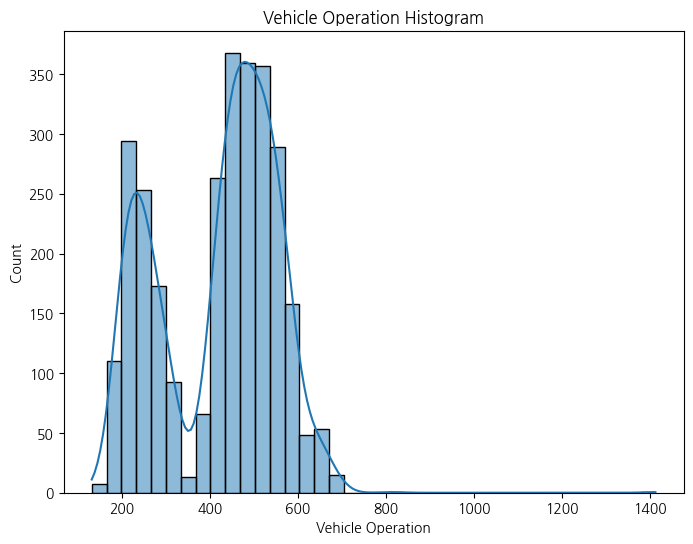

In [31]:
# 차량 운행
univariate_analysis(df, 'Vehicle Operation')

Basic Statistics 기초통계량:
count    2921.000000
mean     3926.209860
std      1509.649338
min       527.000000
25%      2162.000000
50%      4721.000000
75%      5110.000000
max      6182.000000
Name: Service Requests, dtype: float64



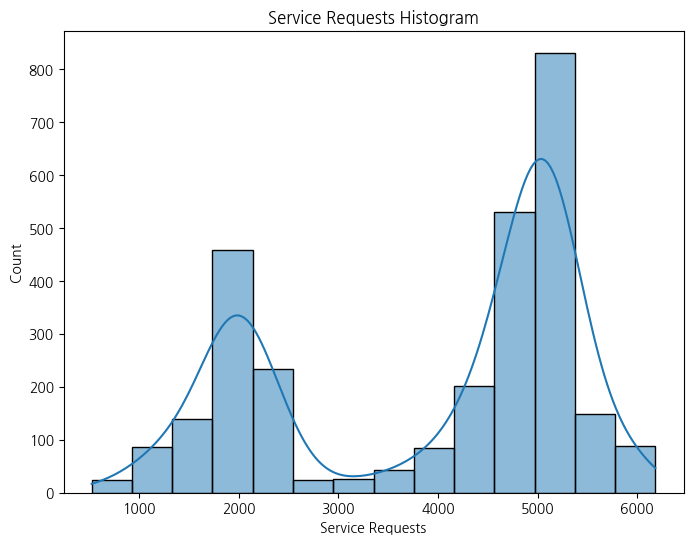

In [32]:
# 접수건
univariate_analysis(df, 'Service Requests')

Basic Statistics 기초통계량:
count    2921.000000
mean     3284.401232
std      1249.080267
min       462.000000
25%      1779.000000
50%      3933.000000
75%      4241.000000
max      5189.000000
Name: Boardings, dtype: float64



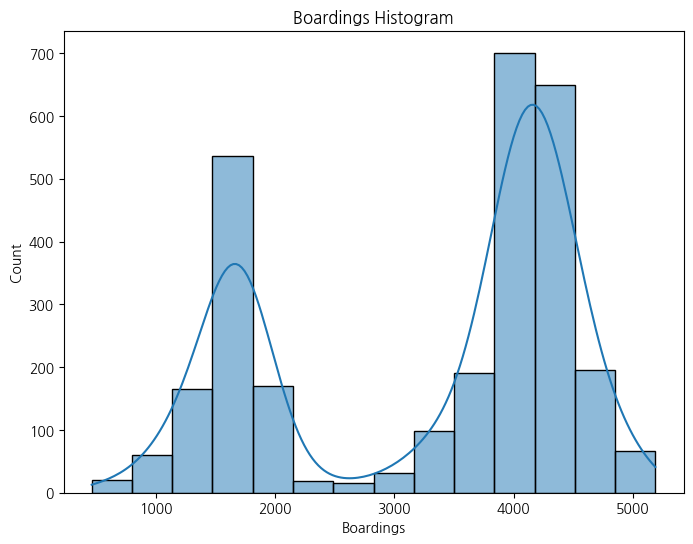

In [33]:
# 탑승건
univariate_analysis(df, 'Boardings')


Basic Statistics 기초통계량:
count    2921.000000
mean       40.307942
std        14.100434
min        17.200000
25%        29.600000
50%        38.200000
75%        48.600000
max        96.100000
Name: Average Wait Time, dtype: float64



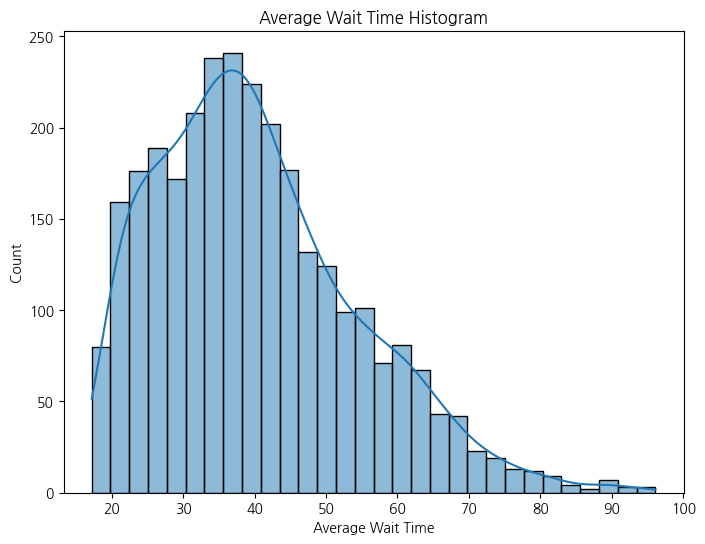

In [35]:
# 평균 대기 시간
univariate_analysis(df, 'Average Wait Time')


Basic Statistics 기초통계량:
count    2921.000000
mean     2304.267717
std       107.278144
min      2131.000000
25%      2228.000000
50%      2257.000000
75%      2401.000000
max      2733.000000
Name: Average Fare, dtype: float64



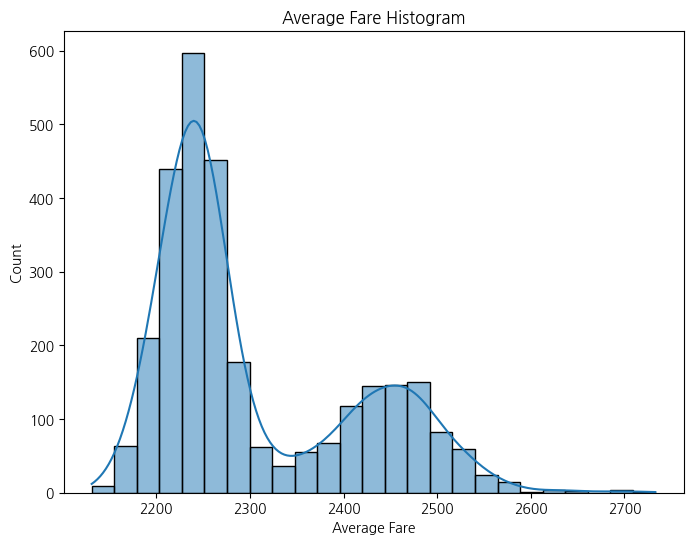

In [36]:
# 평균 요금
univariate_analysis(df, 'Average Fare')


Basic Statistics 기초통계량:
count     2921.000000
mean      9253.437864
std       1019.367122
min       7672.000000
25%       8521.000000
50%       8821.000000
75%      10154.000000
max      14136.000000
Name: Average Distance Traveled, dtype: float64



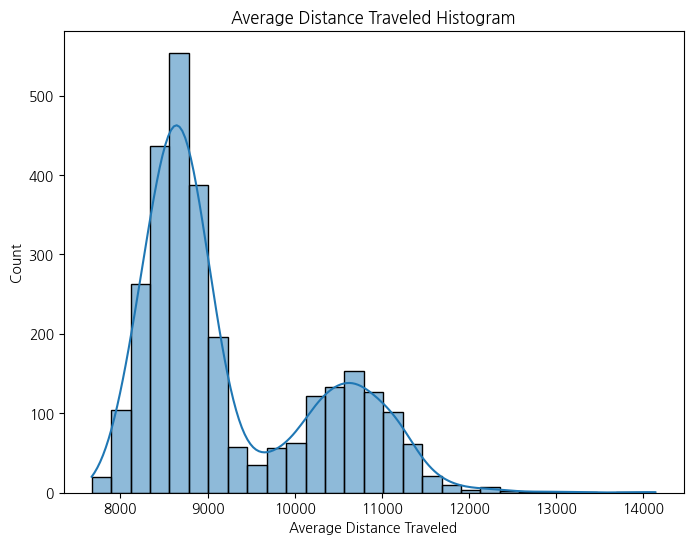

In [37]:
# 평균 승차 거리
univariate_analysis(df, 'Average Distance Traveled')


Basic Statistics 기초통계량:
count    2921.000000
mean       40.311537
std        14.097409
min        17.200000
25%        29.600000
50%        38.200000
75%        48.600000
max        96.100000
Name: target, dtype: float64



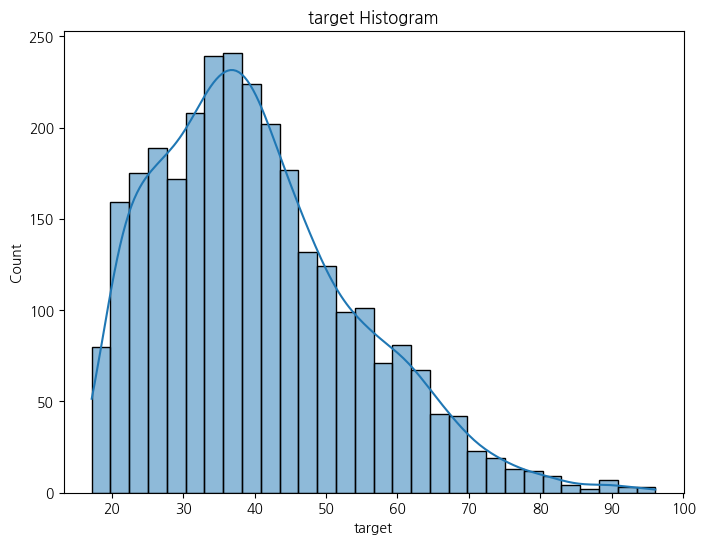

In [39]:
# 예측일의 평균 대기시간 
univariate_analysis(df, 'target')


Basic Statistics 기초통계량:
count    2921.000000
mean       18.077405
std        10.706655
min       -11.200000
25%         9.000000
50%        19.700000
75%        27.400000
max        39.400000
Name: temp_max, dtype: float64



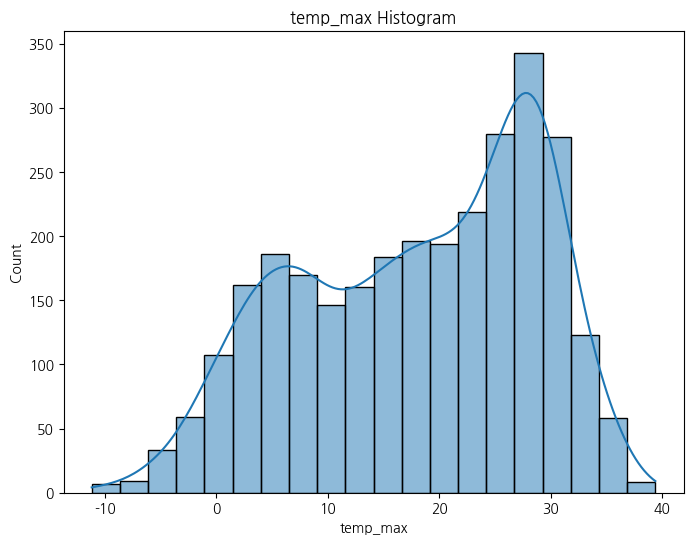

In [41]:
# 최고 온도

univariate_analysis(df, 'temp_max')

Basic Statistics 기초통계량:
count    2921.000000
mean        9.414618
std        10.784649
min       -18.500000
25%         0.500000
50%        10.000000
75%        18.900000
max        30.400000
Name: temp_min, dtype: float64



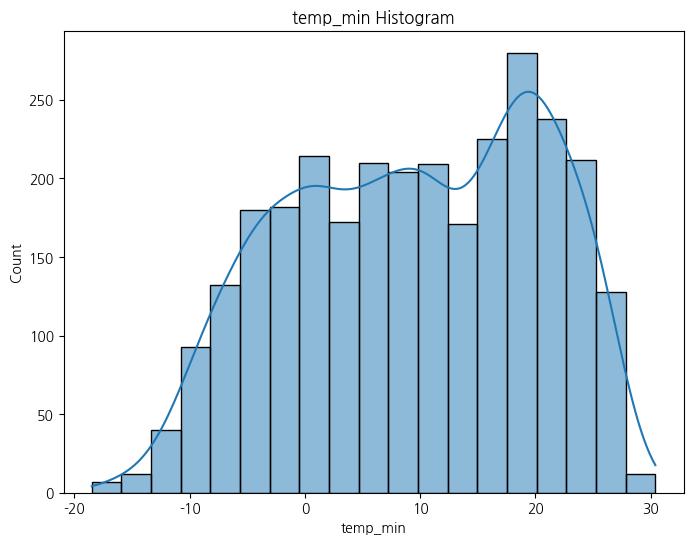

In [42]:
# 최저 온도
univariate_analysis(df, 'temp_min')


Basic Statistics 기초통계량:
count    2921.000000
mean        3.356761
std        12.597807
min         0.000000
25%         0.000000
50%         0.000000
75%         0.300000
max       178.900000
Name: rain(mm), dtype: float64



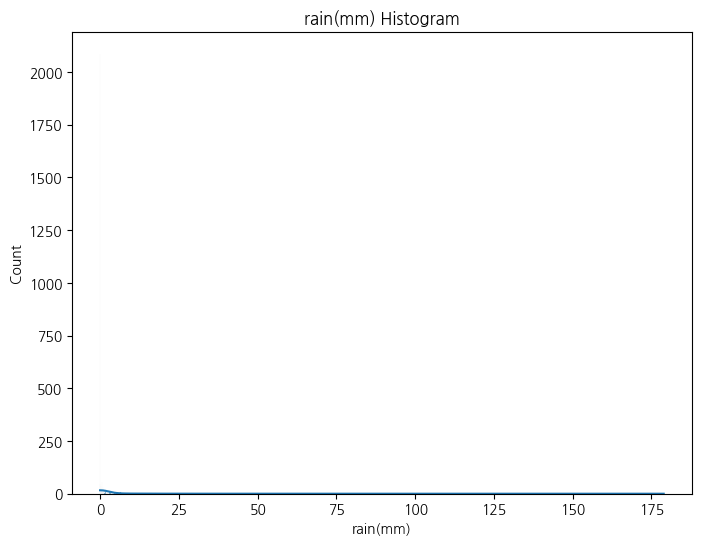

In [43]:
# 강수량
univariate_analysis(df, 'rain(mm)')


Basic Statistics 기초통계량:
count    2921.000000
mean       79.104074
std        14.024176
min        29.000000
25%        70.000000
50%        82.000000
75%        90.000000
max       100.000000
Name: humidity_max(%), dtype: float64



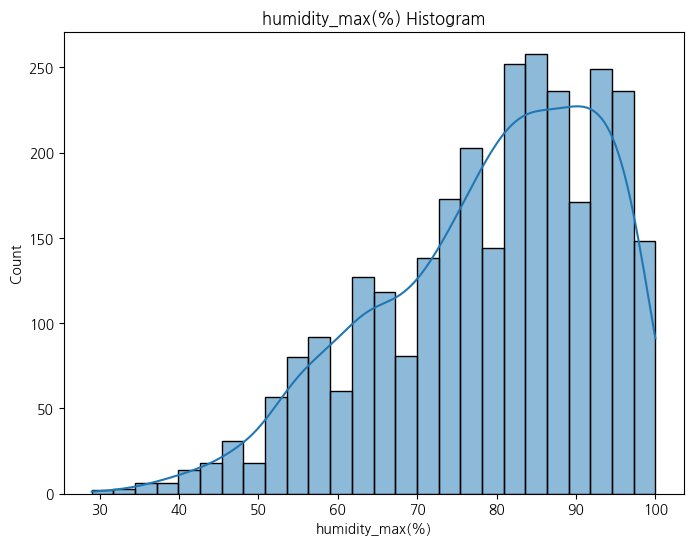

In [44]:
# 최고 습도
univariate_analysis(df, 'humidity_max(%)')


Basic Statistics 기초통계량:
count    2921.000000
mean       41.119411
std        16.401564
min         7.000000
25%        29.000000
50%        39.000000
75%        51.000000
max        98.000000
Name: humidity_min(%), dtype: float64



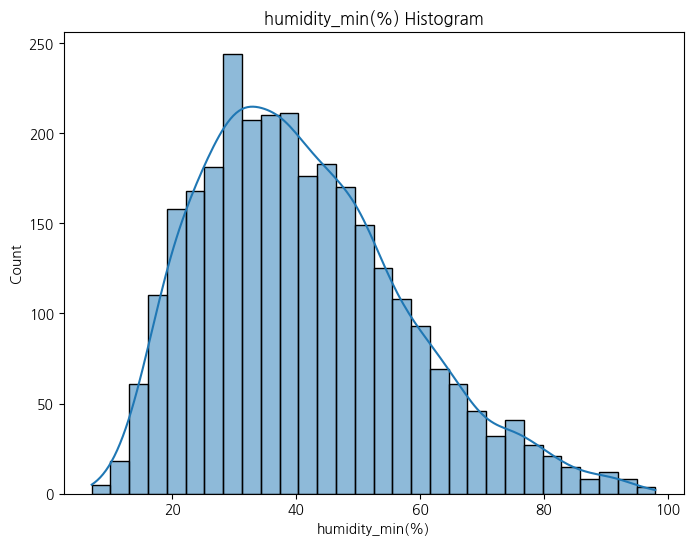

In [45]:
# 최저 습도
univariate_analysis(df, 'humidity_min(%)')


Basic Statistics 기초통계량:
count    2921.000000
mean       13.497693
std         6.941039
min         0.000000
25%         8.240000
50%        12.680000
75%        18.580000
max        30.790000
Name: sunshine(MJ/m2), dtype: float64



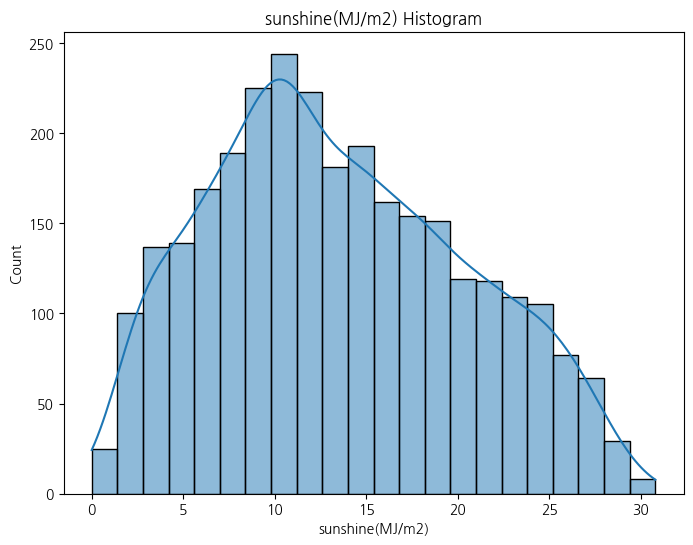

In [46]:
# 햇빛
univariate_analysis(df, 'sunshine(MJ/m2)')


Basic Statistics 기초통계량:
count    2921.000000
mean       40.285735
std        12.046163
min        18.800000
25%        31.271429
50%        39.028571
75%        46.971429
max        83.928571
Name: moving_averages_time, dtype: float64



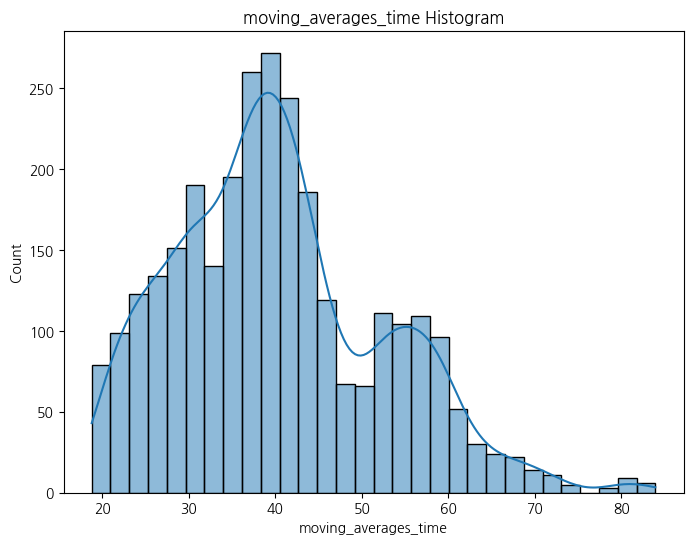

In [47]:
# 이동평균 대기시간
univariate_analysis(df, 'moving_averages_time')


Basic Statistics 기초통계량:
count    2921.000000
mean     3281.656426
std       449.625323
min       924.000000
25%      3113.857143
50%      3371.571429
75%      3559.714286
max      4169.000000
Name: moving_averages_boardings, dtype: float64



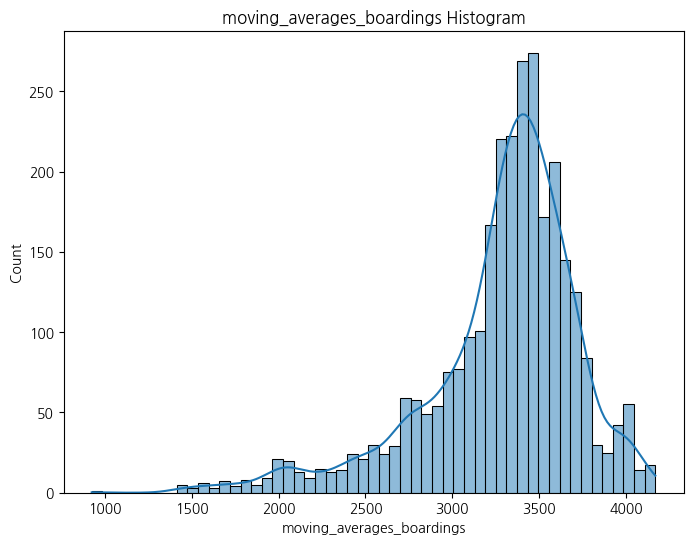

In [48]:
# 이동평균 탑승률
univariate_analysis(df, 'moving_averages_boardings')


### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

In [ ]:
# 범주형 Day of Week 요일
# 범주형 Week 주
# 범주형 Month 월
# 범주형 Year 년
# 범주형 season 계절
# 범주형 is_holiday 공휴일 여부
# ['Day of Week', 'Week', 'Month', 'Year', 'season', 'is_holiday']

Basic Statistics 기초통계량:
count         2921
unique           7
top       Thursday
freq           418
Name: Day of Week, dtype: object



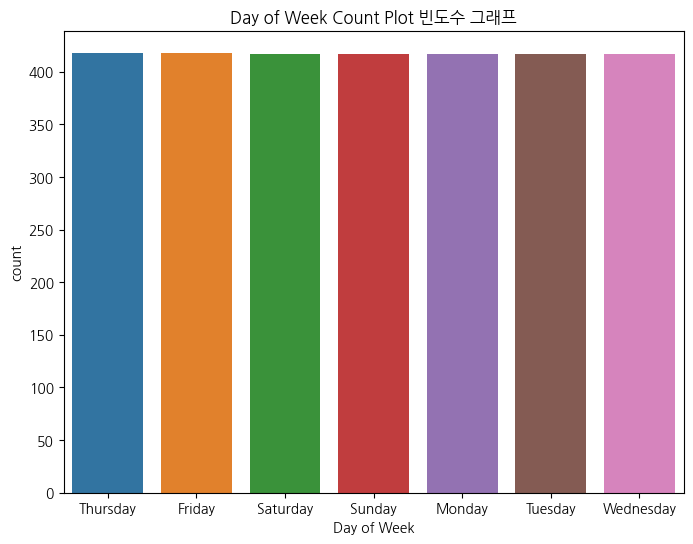

In [49]:
# 요일
univariate_analysis(df, 'Day of Week')


Basic Statistics 기초통계량:
count    2921.000000
mean       26.635741
std        15.062136
min         1.000000
25%        14.000000
50%        27.000000
75%        40.000000
max        53.000000
Name: Week, dtype: float64



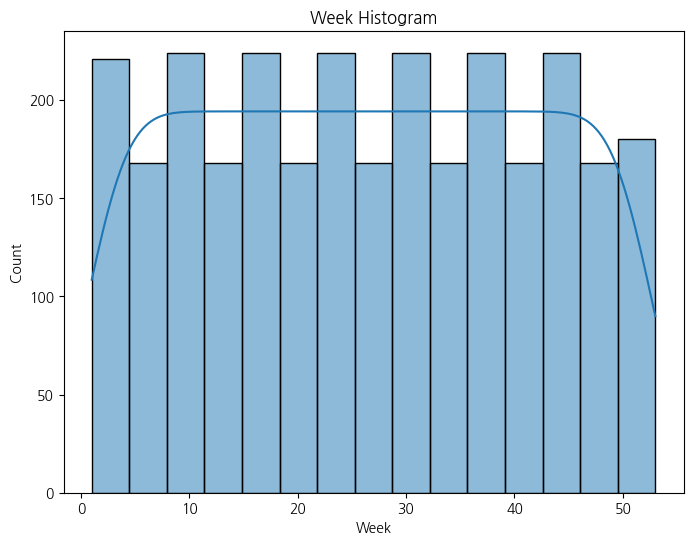

In [50]:
# 주
univariate_analysis(df, 'Week')


Basic Statistics 기초통계량:
count    2921.000000
mean        6.521054
std         3.448394
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: Month, dtype: float64



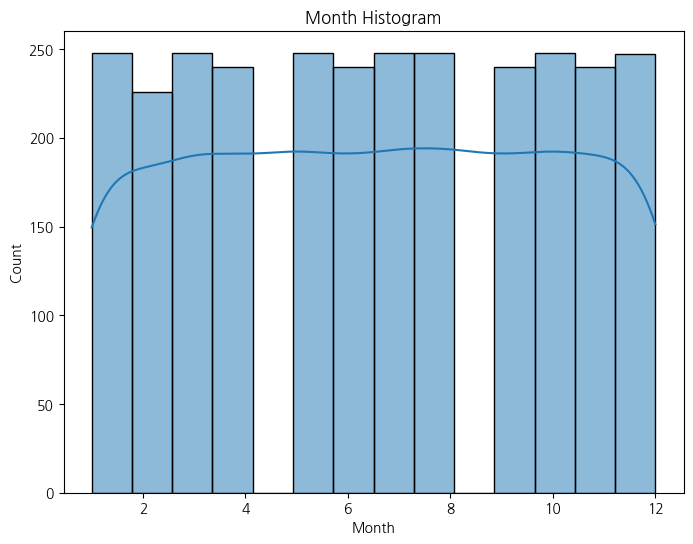

In [51]:
# 월
univariate_analysis(df, 'Month')


Basic Statistics 기초통계량:
count    2921.000000
mean     2018.498459
std         2.291007
min      2015.000000
25%      2016.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: Year, dtype: float64



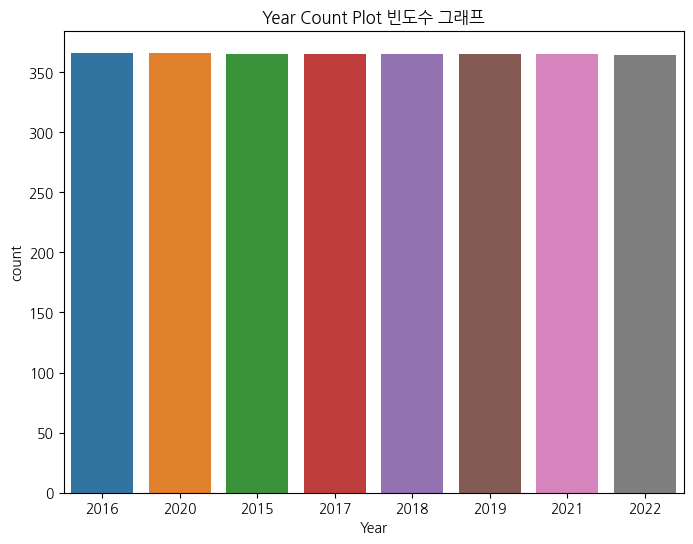

In [52]:
# 년
univariate_analysis(df, 'Year')


Basic Statistics 기초통계량:
count       2921
unique         4
top       spring
freq         736
Name: season, dtype: object



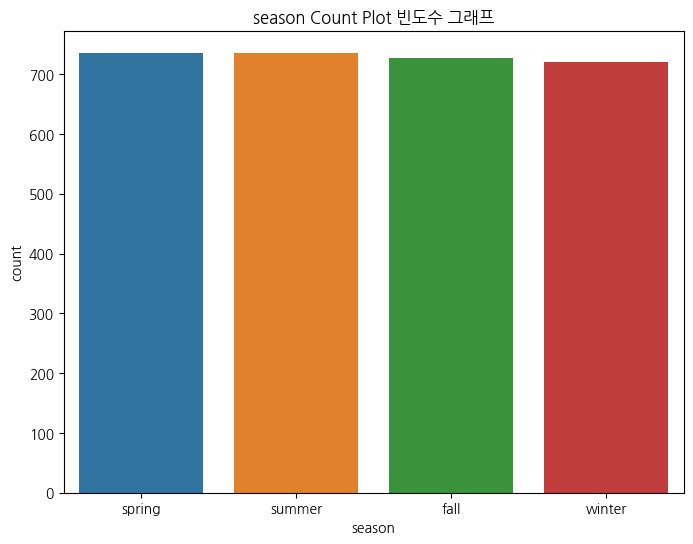

In [53]:
# 계절
univariate_analysis(df, 'season')


Basic Statistics 기초통계량:
count    2921.000000
mean        0.041767
std         0.200089
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: is_holiday, dtype: float64



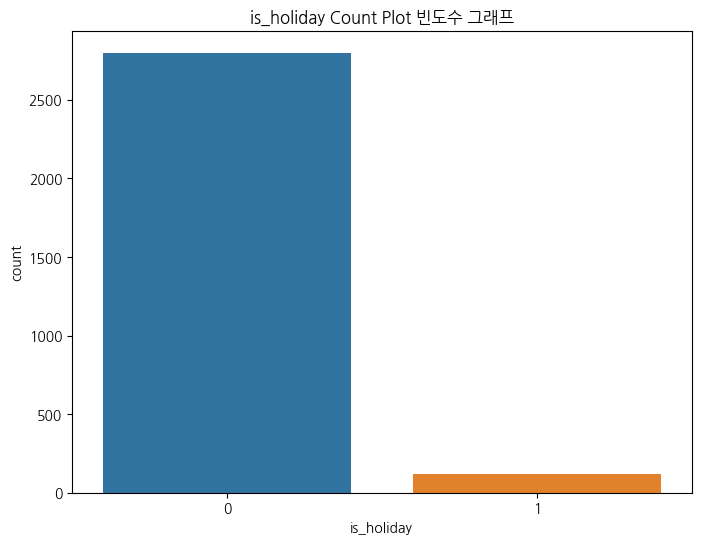

In [54]:
# 공휴일
univariate_analysis(df, 'is_holiday')


## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

<ipython-input-57-49a6f5fffe0f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


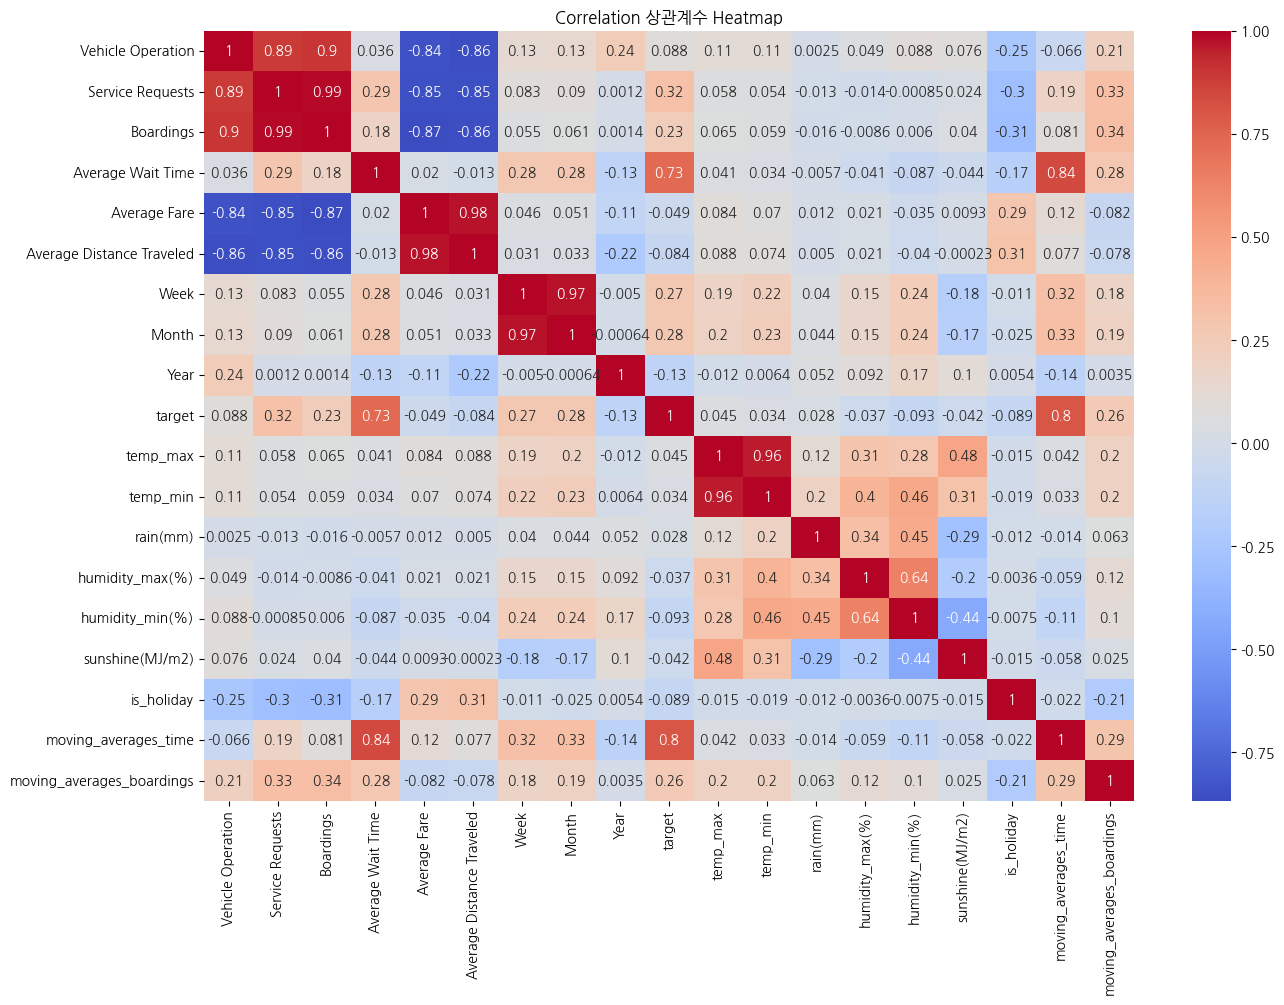

In [57]:
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation 상관계수 Heatmap')
plt.show()


#### 2) 산점도

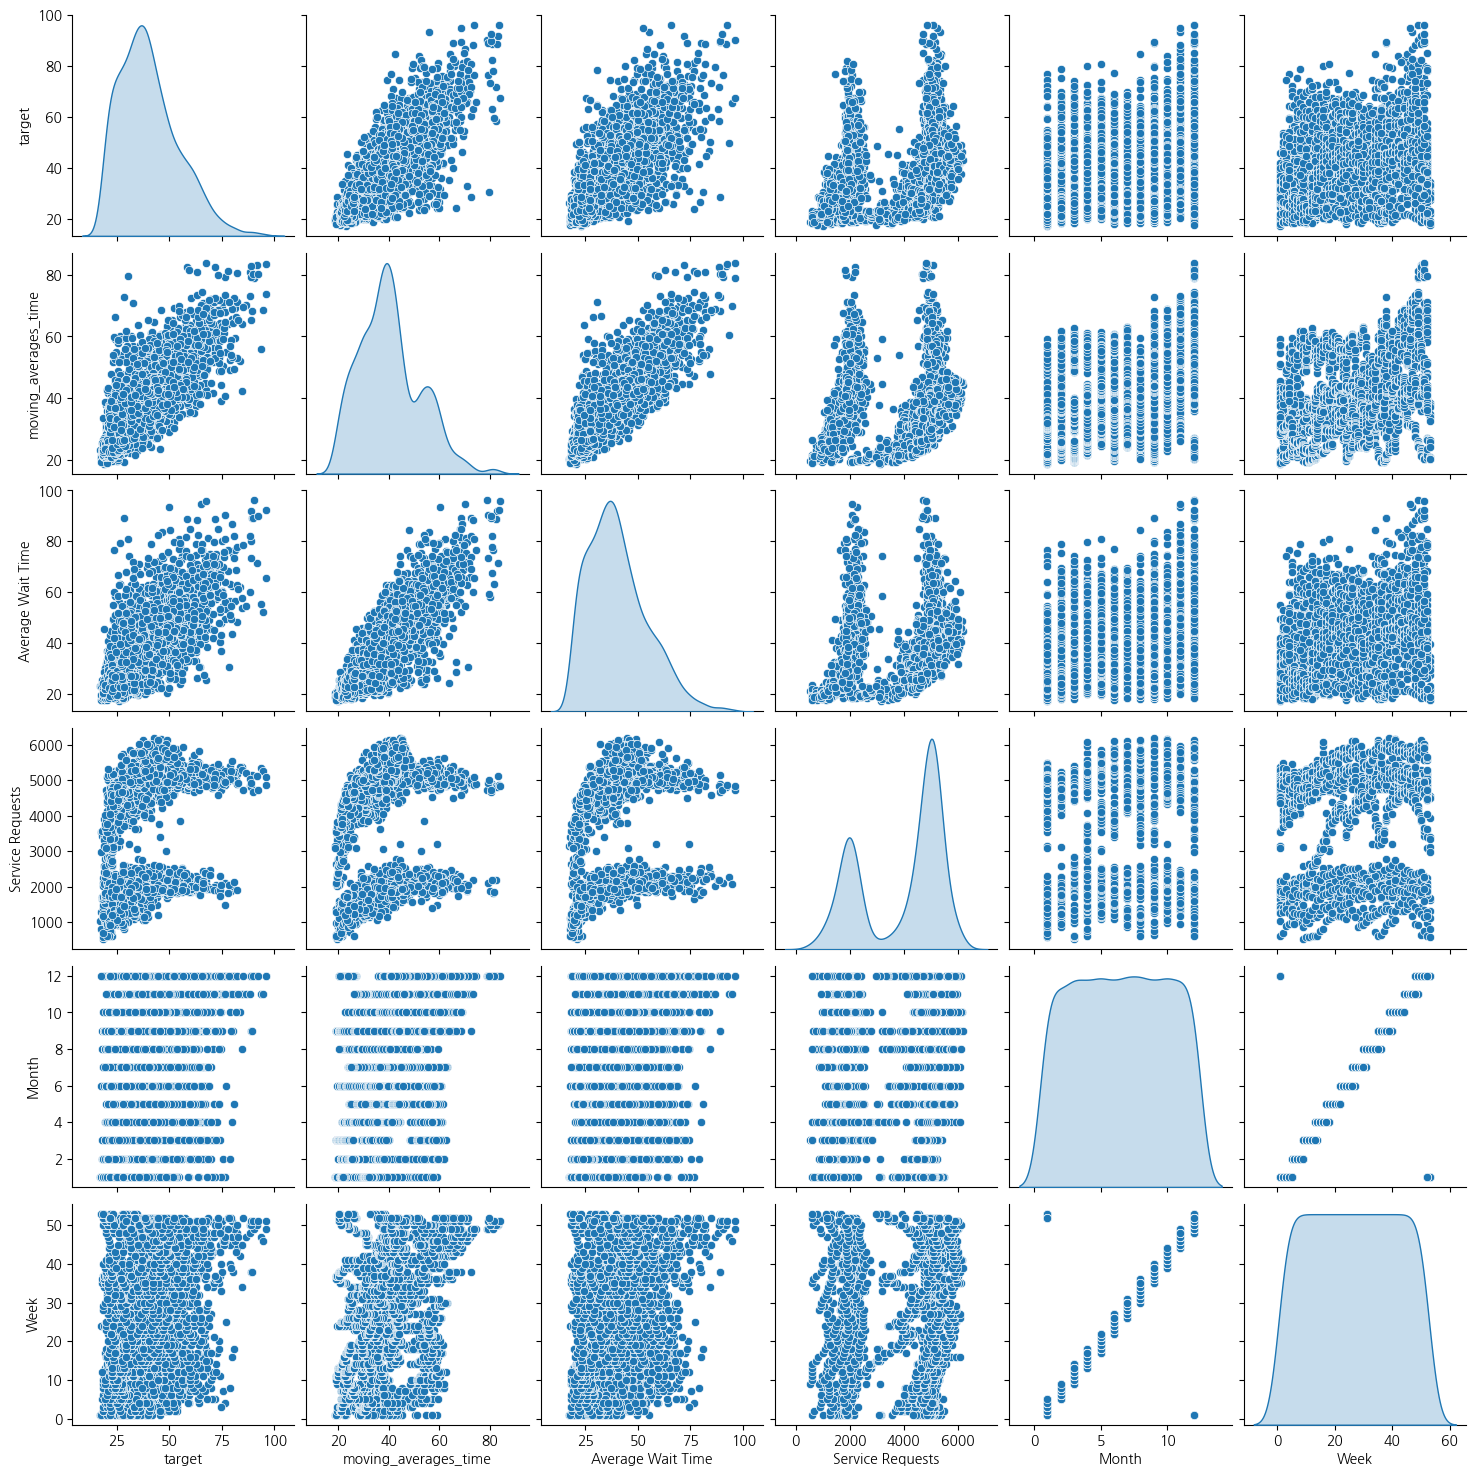

In [58]:
# target과 상위 n개 feature의 scatter plot 그리기
n = 5
top_n_features = corr.nlargest(n+1, 'target')['target'].index # 상위 n개 feature + target
sns.pairplot(df[top_n_features], diag_kind='kde')
plt.show()

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

In [68]:
cat_cols = [col for col in ['Day of Week', 'Week', 'Month', 'Year', 'season', 'is_holiday']]
print(cat_cols)

['Day of Week', 'Week', 'Month', 'Year', 'season', 'is_holiday']


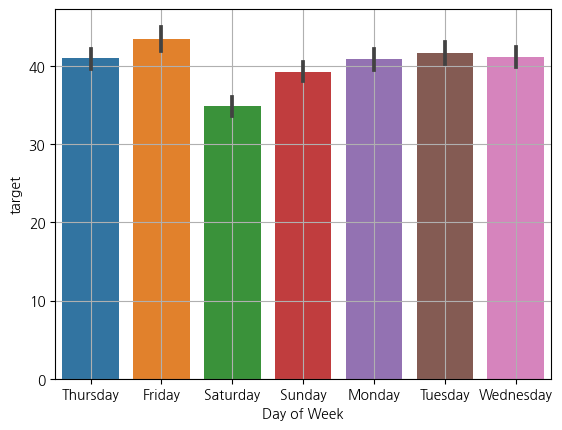

In [87]:
var = 'Day of Week'

sns.barplot(x=var, y='target', data = df)
plt.grid()
plt.show()

In [89]:
# 수치화 ANNOVA 분석
th = df.loc[df[var]=='Thursday', 'target']
fr = df.loc[df[var]=='Friday', 'target']
sat = df.loc[df[var]=='Saturday', 'target']
su = df.loc[df[var]=='Sunday', 'target']
mo = df.loc[df[var]=='Monday', 'target']
tu = df.loc[df[var]=='Tuesday', 'target']
we = df.loc[df[var]=='Wednesday', 'target']

spst.f_oneway(th, fr, sat, su, mo, tu, we)


F_onewayResult(statistic=15.709598754374598, pvalue=7.824951103498204e-18)

<Axes: xlabel='Week', ylabel='target'>

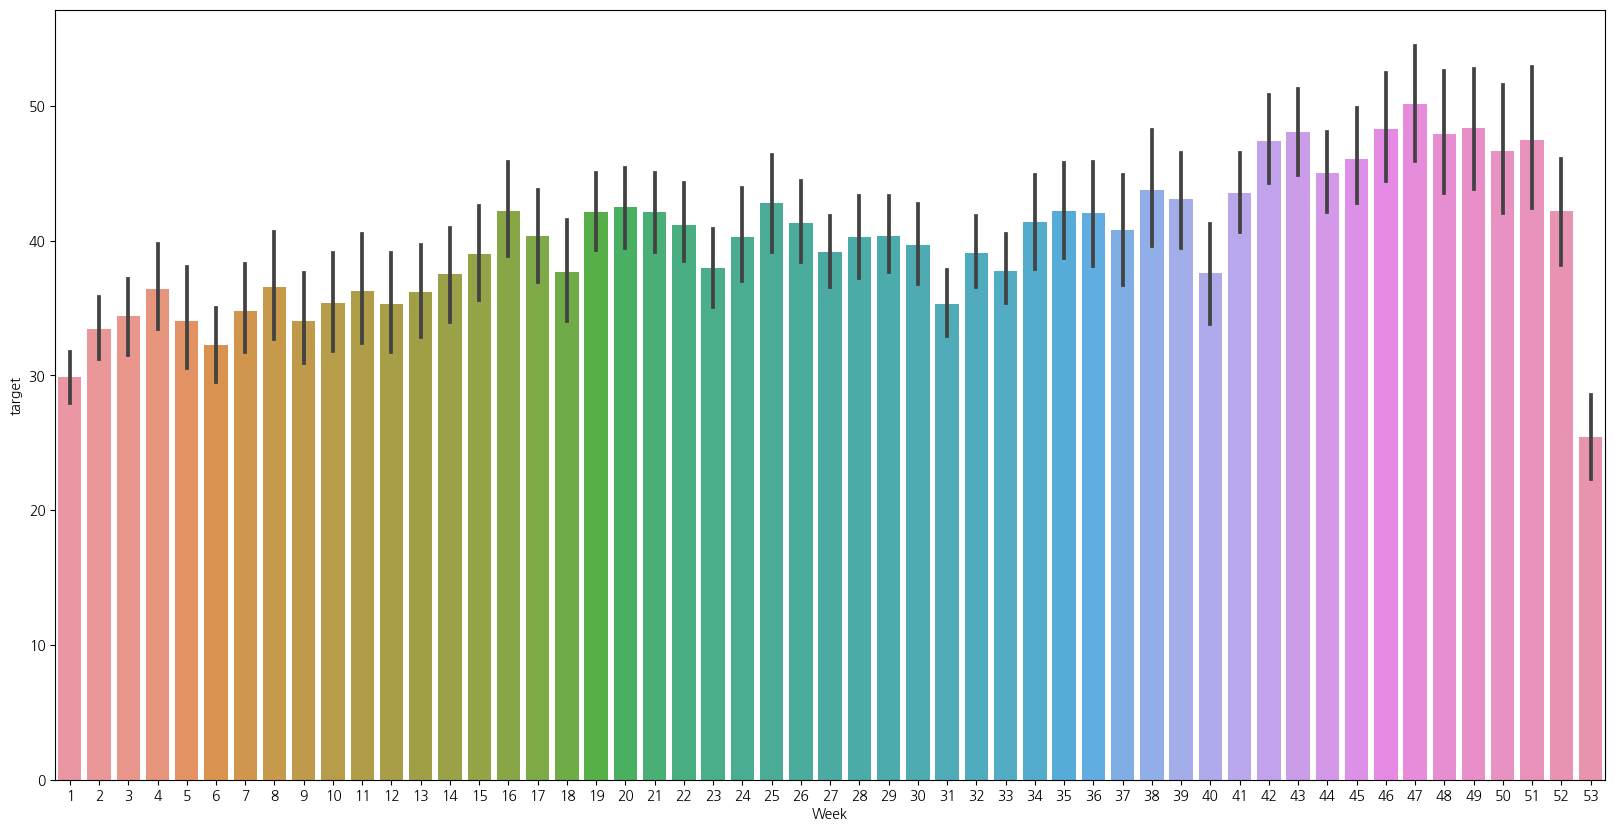

In [79]:
plt.figure(figsize = (20, 10))
sns.barplot(x='Week', y='target', data=df)


<Axes: xlabel='Month', ylabel='target'>

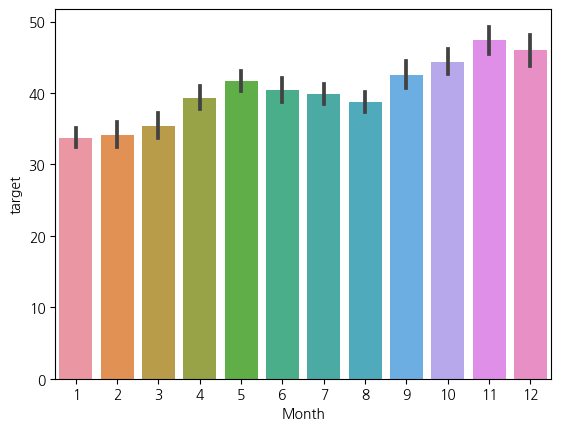

In [76]:
sns.barplot(x='Month', y='target', data=df)


<Axes: xlabel='Year', ylabel='target'>

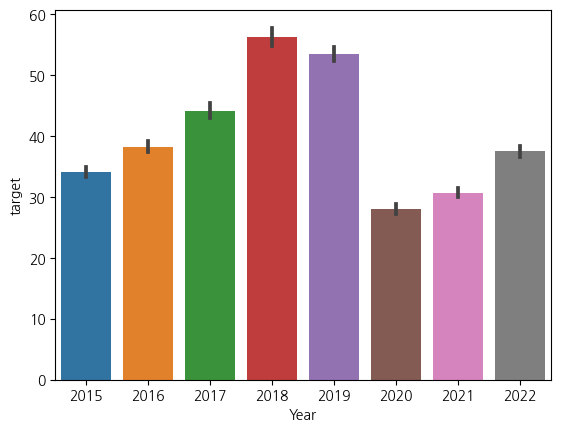

In [75]:
sns.barplot(x='Year', y='target', data=df)


<Axes: xlabel='season', ylabel='target'>

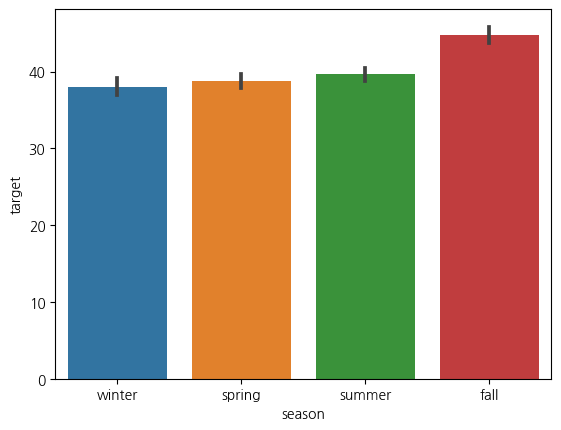

In [74]:
sns.barplot(x='season', y='target', data=df)

t - test :  4.852543803166322
p_value :  1.2828946045779608e-06


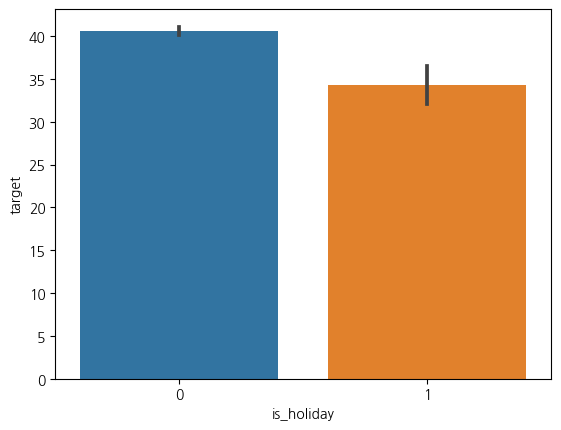

In [82]:
sns.barplot(x='is_holiday', y='target', data=df)

# 수치화 : t-test
from scipy.stats import ttest_ind

# t-검정 실행
t_stat, p_value = ttest_ind(df.loc[df['is_holiday'] == 0, 'target'], 
                            df.loc[df['is_holiday'] == 1, 'target'])

print("t - test : ", t_stat)
print("p_value : ", p_value)


## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

* 중간(약한) 관계의 변수

* (거의) 관계가 없는 변수

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl